<a href="https://colab.research.google.com/github/yoojin-chung/ED-CS/blob/master/plot_behav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Figure - Behavioral training results
 ### Set up and load data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom_test
#from functools import partial

# Load data and reorganize
DF = pd.read_csv('https://github.com/yoojin-chung/ED-CS/raw/master/data/behav.csv')
DF = DF[['animal', 'ses', 'nTar', 'nVis', 'sucVis', 'nAud', 'sucAud']]
DF

,animal,ses,nTar,nVis,sucVis,nAud,sucAud
0,J6,1,4,35,2,0,0
1,J6,2,4,88,7,0,0
2,J6,3,4,93,10,0,0
3,J6,4,4,103,8,0,0
4,J6,5,3,85,4,0,0
...,...,...,...,...,...,...,...
183,J10,42,4,0,0,101,42
184,J10,43,4,0,0,348,122
185,J10,44,4,0,0,337,98
186,J10,45,4,24,16,46,14


### Compute p-values

In [2]:
# We subtract 1 from the number of targets because the target nearest to the animal was excluded in each trial
# my_binom = partial(binom_test, alternative='greater')
my_binom = lambda a, b, c: binom_test(a, b, 1/(c-1), alternative='greater')
DF['vis_aud'] = list(map(my_binom, DF.sucVis, DF.nVis, DF.nTar))
DF['aud'] = list(map(my_binom, DF.sucAud, DF.nAud, DF.nTar))
# DF['vis_aud'] = DF.apply(
#     lambda x: binom_test(x['sucVis'], x['nVis'], 1/(x['nTar']-1), alternative='greater'), axis=1)

# Set p-values to NaN if there were no trials
DF.loc[DF.nVis==0, 'vis_aud'] = np.nan
DF.loc[DF.nAud==0, 'aud'] = np.nan
# Set p-values<0.001 to a small value for plotting
DF.loc[DF.vis_aud<0.001, 'vis_aud'] = 0.0003
DF.loc[DF.aud<0.001, 'aud'] = 0.0003
DF

,animal,ses,nTar,nVis,sucVis,nAud,sucAud,vis_aud,aud
0,J6,1,4,35,2,0,0,0.999987,NaN
1,J6,2,4,88,7,0,0,1.000000,NaN
2,J6,3,4,93,10,0,0,1.000000,NaN
3,J6,4,4,103,8,0,0,1.000000,NaN
4,J6,5,3,85,4,0,0,1.000000,NaN
...,...,...,...,...,...,...,...,...,...
183,J10,42,4,0,0,101,42,NaN,0.050872
184,J10,43,4,0,0,348,122,NaN,0.264611
185,J10,44,4,0,0,337,98,NaN,0.957994
186,J10,45,4,24,16,46,14,0.000300,0.712521


### Plot results

,animal,Session,Trial type,P-value,sig
0,J6,1,vis_aud,0.999987,False
1,J6,2,vis_aud,1.000000,False
2,J6,3,vis_aud,1.000000,False
3,J6,4,vis_aud,1.000000,False
4,J6,5,vis_aud,1.000000,False
...,...,...,...,...,...
371,J10,42,aud,0.050872,False
372,J10,43,aud,0.264611,False
373,J10,44,aud,0.957994,False
374,J10,45,aud,0.712521,False


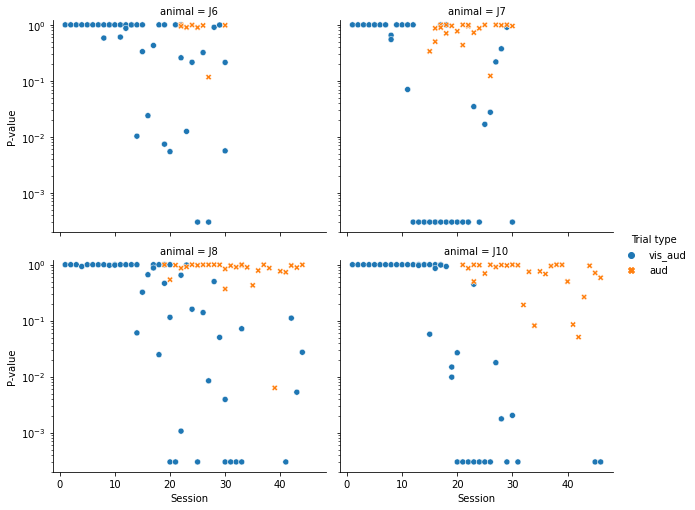

In [3]:
melted = pd.melt(DF, id_vars=['animal', 'ses'], value_vars=['vis_aud', 'aud'])
melted = melted.rename(columns={'ses': 'Session', 'variable': 'Trial type', 'value': 'P-value'})
melted['sig'] = melted['P-value']<0.05
sns.relplot(x='Session', y='P-value', 
            style='Trial type', hue='Trial type', 
            col='animal', col_wrap=2, data=melted, height=3.5, aspect=1.2)
plt.yscale('log')
plt.ylim([0.0002, 1.2])
melted

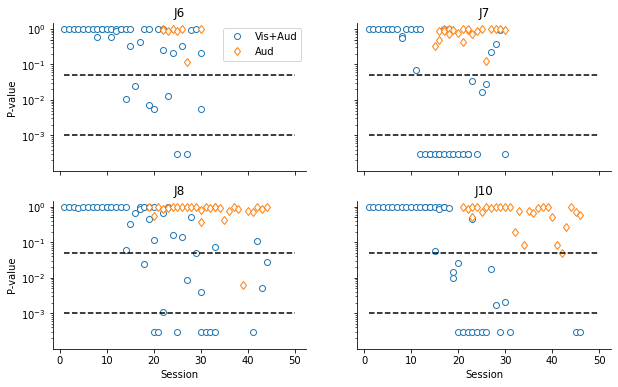

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True) 
animals = DF.animal.unique()

for n, animal in enumerate(animals): 
    result = DF[DF.animal==animal]
    x = n // 2
    y = n % 2
    axes[x, y].plot(result['ses'][result.nVis != 0],
               result.vis_aud[result.nVis != 0], linestyle='',
                    marker='o', markerfacecolor='w', label='Vis+Aud')
    axes[x, y].plot(result['ses'][result.nAud != 0],
               result.aud[result.nAud != 0], linestyle='', 
                    marker='d', markerfacecolor='w', label='Aud')
    
    axes[x, y].plot([1, 50], [0.05, 0.05], '--k')
    axes[x, y].plot([1, 50], [0.001, 0.001], '--k')
    if n > 1:
        axes[x, y].set_xlabel('Session')
    if y == 0:
        axes[x, y].set_ylabel('P-value')
    if n == 0:
        axes[x, y].legend(loc='best')
    axes[x, y].spines['right'].set_color('none')
    axes[x, y].spines['top'].set_color('none')
    axes[x, y].set_yscale('log')
    axes[x, y].set_title(animal)
    axes[x, y].set_ylim([0.0001, 1.5])
    axes[x, y].set_yticks([0.001, 0.01, 0.1, 0.5, 1])
    
#plt.savefig('behav_results.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


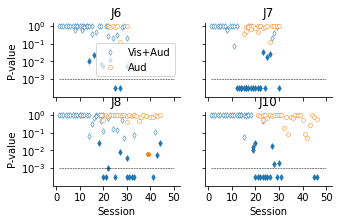

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(5, 3), sharex=True, sharey=True) 
animals = DF.animal.unique()
#colors = plt.colormaps()
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
for n, animal in enumerate(animals): 
    result = melted[melted.animal==animal]
    x = n // 2
    y = n % 2
    # opts = {'linestyle':'', 'markersize':3, 'markeredgewidth':0.5, 'alpha':0.5}
    axes[x, y].plot(result['Session'][(result['Trial type']=='vis_aud')],
                    result['P-value'][(result['Trial type']=='vis_aud')],
                    label='Vis+Aud',
                    marker='d', markeredgecolor=cycle[0], markerfacecolor='w',
                    linestyle='', markersize=4, markeredgewidth=0.5)
    # plt.setp(opts)
    axes[x, y].plot(result['Session'][(result['Trial type']=='vis_aud') & result['sig']],
                    result['P-value'][(result['Trial type']=='vis_aud') & result['sig']],
                    marker='d', markeredgecolor=cycle[0], markerfacecolor=cycle[0],
                    linestyle='', markersize=4, markeredgewidth=0.5)
    axes[x, y].plot(result['Session'][(result['Trial type']=='aud')],
                    result['P-value'][(result['Trial type']=='aud')],
                    label='Aud',
                    marker='o', markeredgecolor=cycle[1], markerfacecolor='w',
                    linestyle='', markersize=4, markeredgewidth=0.5)
    axes[x, y].plot(result['Session'][(result['Trial type']=='aud') & result['sig']],
                    result['P-value'][(result['Trial type']=='aud') & result['sig']],
                    marker='o', markeredgecolor=cycle[1], markerfacecolor=cycle[1],
                    linestyle='', markersize=4, markeredgewidth=0.5)
    
    
    # axes[x, y].plot([1, 50], [0.05, 0.05], '--k')
    axes[x, y].plot([1, 50], [0.001, 0.001], '--k', linewidth=0.5)
    if n > 1:
        axes[x, y].set_xlabel('Session')
    if y == 0:
        axes[x, y].set_ylabel('P-value')
    if n == 0:
        axes[x, y].legend(loc='best')
    axes[x, y].spines['right'].set_color('none')
    axes[x, y].spines['top'].set_color('none')
    axes[x, y].set_yscale('log')
    axes[x, y].set_title(animal)
    axes[x, y].set_ylim([0.0001, 1.5])
    axes[x, y].set_yticks([0.001, 0.01, 0.1, 1])
    axes[x, y].set_xticks(np.arange(0, 51, 10))
    
plt.savefig('behav_results.eps', format='eps')